In [2]:
#Jannayna Domingues - Exercicio tratamento dados - Paciente

In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
#Carregar os dados
dataset = pd.read_csv("dados_pacientes.csv", sep =",")
#visulizar os dados
dataset.head()


,Unnamed: 0,ID,Idade,Peso,Sexo,Manchas,Temperatura,Diagnóstico
0,0,0,62.0,115.0,M,Concentradas,47.0,Doente
1,1,1,65.0,59.0,Homem,NaN,38.0,Ss
2,3,2,NaN,107.0,NaN,Espalhadas,39.0,D
3,4,3,45.0,82.0,Masculino,Espalhadas,40.0,Doente
4,4,3,45.0,82.0,H,Espalhadas,40.0,Doente


In [7]:
dataset.shape

(59, 8)

In [9]:
#Verificar se há valores ausentes NaN
dataset.isnull().sum()

Unnamed: 0      0
ID              0
Idade           6
Peso            5
Sexo            4
Manchas        11
Temperatura    10
Diagnóstico     9
dtype: int64

In [11]:
#Verificar se há objetos repetidos no dataset e eliminar
dataset[dataset.duplicated(['ID'],keep=False)]

,Unnamed: 0,ID,Idade,Peso,Sexo,Manchas,Temperatura,Diagnóstico
3,4,3,45.0,82.0,Masculino,Espalhadas,40.0,Doente
4,4,3,45.0,82.0,H,Espalhadas,40.0,Doente


In [11]:
#Excluir o duplicado pelo ID
dataset.drop_duplicates(subset="ID", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['ID'],keep=False)]

,Unnamed: 0,ID,Idade,Peso,Sexo,Manchas,Temperatura,Diagnóstico


In [13]:
#Tratamneto do atributo IDADE
agrupado = dataset.groupby(['Idade']).size()
agrupado

Idade
18.0    2
19.0    1
21.0    1
23.0    1
24.0    1
27.0    1
31.0    1
33.0    1
34.0    1
35.0    2
36.0    1
37.0    2
38.0    1
39.0    1
41.0    1
42.0    4
43.0    1
45.0    8
47.0    1
50.0    1
54.0    1
55.0    1
56.0    1
57.0    3
62.0    2
64.0    2
65.0    2
67.0    1
68.0    1
69.0    2
71.0    1
76.0    1
77.0    1
dtype: int64

In [15]:
#Analise numérica do atributo IDADE
dataset['Idade'].describe()

count    52.000000
mean     46.711538
std      15.659786
min      18.000000
25%      36.750000
50%      45.000000
75%      58.250000
max      77.000000
Name: Idade, dtype: float64

In [17]:
#srn.boxplot(dataset['Idade']).set_title('Idade')

In [19]:
#Calculo da Mediana do atributo IDADE
mediana = sts.median(dataset['Idade'])
mediana

45.0

In [21]:
#Varificando os valores fora do intevalo válido
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] > 100), 'Idade'] 

Series([], Name: Idade, dtype: float64)

In [23]:
#Elimindando valores inválidos e add a mediana
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] > 100), 'Idade'] = mediana

In [25]:
#Preenchendo os valores ausentes em IDADE com a mediana
dataset['Idade'].fillna(mediana, inplace=True)
dataset.isnull().sum()

Unnamed: 0      0
ID              0
Idade           0
Peso            5
Sexo            4
Manchas        11
Temperatura    10
Diagnóstico     9
dtype: int64

In [27]:
#Tratamento do atributo PESO
agrupado = dataset.groupby(['Peso']).size()
agrupado

Peso
45.0     4
50.0     2
51.0     1
53.0     1
54.0     1
55.0     1
56.0     1
59.0     2
62.0     1
63.0     1
65.0     1
70.0     1
73.0     2
78.0     1
81.0     1
82.0     2
84.0     1
85.0     4
86.0     1
88.0     1
91.0     3
92.0     1
96.0     1
99.0     1
102.0    1
103.0    2
107.0    4
108.0    1
114.0    1
115.0    2
118.0    2
119.0    1
270.0    1
320.0    1
475.0    1
dtype: int64

In [29]:
#Analise numérica do atributo PESO
dataset['Peso'].describe()

count     53.000000
mean      97.396226
std       70.759707
min       45.000000
25%       62.000000
50%       85.000000
75%      107.000000
max      475.000000
Name: Peso, dtype: float64

Text(0.5, 1.0, 'Peso')

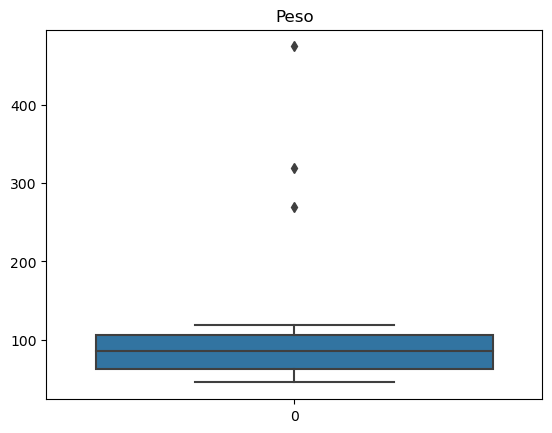

In [13]:
srn.boxplot(dataset['Peso']).set_title('Peso')

In [33]:
#Calcular a mediana do atributo PESO
mediana =  sts.median(dataset['Peso'])
mediana

91.5

In [35]:
#Preenchendo os valores ausentes em PESO com a mediana
dataset['Peso'].fillna(mediana, inplace=True)
dataset.isnull().sum()

Unnamed: 0      0
ID              0
Idade           0
Peso            0
Sexo            4
Manchas        11
Temperatura    10
Diagnóstico     9
dtype: int64

In [37]:
#Verificar valores fora do intervalo de atribuir a 
dataset.loc[(dataset['Peso'] > 200 ) ,'Peso'] 

19    270.0
30    320.0
51    475.0
Name: Peso, dtype: float64

In [39]:
dataset.loc[(dataset['Peso'] > 200 ) ,'Peso'] = mediana

In [41]:
#Tratamento do atributo SEXO
agrupado = dataset.groupby(['Sexo']).size()
agrupado

Sexo
F             1
Feminino     28
Homem         1
M             1
Masculino    21
Menina        1
Mulher        1
dtype: int64

In [43]:
dataset['Sexo'].describe()

count           54
unique           7
top       Feminino
freq            28
Name: Sexo, dtype: object

In [45]:
#Tratamento do atributo SEXO - F, Menina, Mulher, 
dataset.loc[dataset['Sexo'].isin( ['F','Menina','Mulher']), 'Sexo'] = "Feminino"
dataset.loc[dataset['Sexo'].isin( ['H','M','Menino','Homem']), 'Sexo'] = "Masculino"
#visualiza o resultado
agrupado = dataset.groupby(['Sexo']).size()
agrupado

Sexo
Feminino     31
Masculino    23
dtype: int64

In [47]:
#Verificar valores ausentes NaN no atributo SEXO
dataset['Sexo'].fillna('Feminino', inplace=True)
dataset.isnull().sum()

Unnamed: 0      0
ID              0
Idade           0
Peso            0
Sexo            0
Manchas        11
Temperatura    10
Diagnóstico     9
dtype: int64

In [49]:
#Tratamento do atributo MANCHAS
agrupado = dataset.groupby(['Manchas']).size()
agrupado

Manchas
Ausentes         7
Concentradas     9
Espalhadas      31
dtype: int64

In [51]:
dataset['Manchas'].describe()

count             47
unique             3
top       Espalhadas
freq              31
Name: Manchas, dtype: object

In [53]:
#Verificar valores ausentes NaN no atributo MANCHAS
dataset['Manchas'].fillna('Espalhadas', inplace=True)
dataset.isnull().sum()

Unnamed: 0      0
ID              0
Idade           0
Peso            0
Sexo            0
Manchas         0
Temperatura    10
Diagnóstico     9
dtype: int64

In [55]:
#Tratamento do atributo TEMPERATURA
agrupado = dataset.groupby(['Temperatura']).size()
agrupado

Temperatura
37.0     7
38.0     9
39.0    21
40.0     8
43.0     1
47.0     1
52.0     1
dtype: int64

In [57]:
dataset['Temperatura'].describe()

count    48.000000
mean     39.208333
std       2.492186
min      37.000000
25%      38.000000
50%      39.000000
75%      39.000000
max      52.000000
Name: Temperatura, dtype: float64

In [59]:
#srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [61]:
#Eliminar valores fora do intervalo
dataset.loc[(dataset['Temperatura'] <  36 )  | ( dataset['Temperatura']> 40), 'Temperatura'] 

0    47.0
5    52.0
9    43.0
Name: Temperatura, dtype: float64

In [63]:
mediana =  sts.median(dataset['Temperatura'])
mediana

39.0

In [65]:
#Substituindo os valores fora do padrão, pela Mediana
dataset.loc[(dataset['Temperatura'] <  36 )  | ( dataset['Temperatura']> 40), 'Temperatura'] = mediana
dataset.loc[(dataset['Temperatura'] <  36 )  | ( dataset['Temperatura']> 40), 'Temperatura'] 

Series([], Name: Temperatura, dtype: float64)

In [67]:
#Verificando valores ausentes e substituindo pela mediana
dataset['Temperatura'].fillna(mediana, inplace=True)
dataset.isnull().sum()

Unnamed: 0     0
ID             0
Idade          0
Peso           0
Sexo           0
Manchas        0
Temperatura    0
Diagnóstico    9
dtype: int64

In [69]:
dataset['Temperatura'].describe()

count    58.000000
mean     38.741379
std       0.849362
min      37.000000
25%      38.000000
50%      39.000000
75%      39.000000
max      40.000000
Name: Temperatura, dtype: float64

In [71]:
#Taratamento do parametro DIAGNOSTICO
agrupado = dataset.groupby(['Diagnóstico']).size()
agrupado

Diagnóstico
D            2
DD           1
Dd           1
Doente      23
S            1
Saudável    20
Ss           1
dtype: int64

In [73]:
dataset['Diagnóstico'].describe()

count         49
unique         7
top       Doente
freq          23
Name: Diagnóstico, dtype: object

In [75]:
#Eliminando valores errados D DD Dd S Ss
dataset.loc[dataset['Diagnóstico'].isin( ['D','Dd','DD']), 'Diagnóstico'] = "Doente"
dataset.loc[dataset['Diagnóstico'].isin( ['S','Ss']), 'Diagnóstico'] = "Saudável"
#visualiza o resultado
agrupado = dataset.groupby(['Diagnóstico']).size()
agrupado

Diagnóstico
Doente      27
Saudável    22
dtype: int64

In [77]:
#Substitindo valores ausentes pela moda
dataset['Diagnóstico'].fillna('Doente', inplace=True)
dataset.isnull().sum()

Unnamed: 0     0
ID             0
Idade          0
Peso           0
Sexo           0
Manchas        0
Temperatura    0
Diagnóstico    0
dtype: int64

In [79]:
dataset.head()

,Unnamed: 0,ID,Idade,Peso,Sexo,Manchas,Temperatura,Diagnóstico
0,0,0,62.0,115.0,Masculino,Concentradas,39.0,Doente
1,1,1,65.0,59.0,Masculino,Espalhadas,38.0,Saudável
2,3,2,45.0,107.0,Feminino,Espalhadas,39.0,Doente
3,4,3,45.0,82.0,Masculino,Espalhadas,40.0,Doente
5,5,4,21.0,91.5,Feminino,Espalhadas,39.0,Saudável


In [81]:
dataset.shape

(58, 8)

In [83]:
dataset.to_csv('dados_pacientes_NOVO.csv')